# Try-It Activity 23.2: Forecasting with Decomposition Models
This try-it activity focuses on using Keras to build models on sequential data. This could either be sequential numeric data or you can consider text as sequential data. Keras contains both preprocessing tools similar to that of the ImageDataGenerator for time series and text data. There are also various layer architectures to choose from including the LSTM, GRU, and even the Conv1D. You will select a time series dataset using the pandas.datareader functionality or locate a text dataset from an external source to build the network.



I am using 10.2 solution again for this exercise:

You have now learned to decompose a time series into seasonal and trend components and to use time series to forecast into the future using statsmodels. In this activity, your goal is to identify a new (to you) time series dataset and build a forecast using a seasonal and trend additive or multiplicative model using statsmodels.

Summarize your findings in an executive brief that explores the following:

+ **Data description**: Provide a high-level overview of your data and its timeframe along with general information on your dataset

+ **Forecast**: Give a description of the forecast. Describe the period that was projected and what the forecast implies about your data. Be sure to include presentation-ready plots with appropriate labels and titles.

+ **Uncertainty**: Discuss the evaluation of your model on testing data, and explore the residuals. Discuss the consequence of this error for your model and forecasts. Is there still structure to uncover?

Suggested resources for finding data:
+ Bureau of Labor Statistics (Links to an external site.): Contains numerous time series, such as the Consumer Price Index and inflation indices
+ Kaggle (Links to an external site.): Contains numerous time series datasets from different contexts
+ UCI Machine Learning Repository (Links to an external site.): Contains many time series example datasets

## Air Quality
Attribute Information:

    0 Date (DD/MM/YYYY)
    1 Time (HH.MM.SS)
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
    7 True hourly averaged NOx concentration in ppb (reference analyzer)
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
    12 Temperature in Â°C
    13 Relative Humidity (%)
    14 AH Absolute Humidity

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
aq = pd.read_csv('data/AirQualityUCI.csv', delimiter = ';')

In [4]:
aq.head(15)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848",NaN,NaN
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603",NaN,NaN
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",NaN,NaN
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648",NaN,NaN
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517",NaN,NaN


In [5]:
# initialize dataset
airq=aq

In [6]:
# transform date and time to timestamp!
airq['datetime'] = pd.to_datetime(aq['Date'] + ' ' + aq['Time'], format='%d/%m/%Y %H.%M.%S')

In [7]:
airq=airq[['datetime','CO(GT)']].dropna()

In [8]:
# make float CO
airq['CO'] = airq['CO(GT)'].str.replace(',','.').astype('float')
#airq['CO'] = airq['CO'].astype('float')

In [9]:
airq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  9357 non-null   datetime64[ns]
 1   CO(GT)    9357 non-null   object        
 2   CO        9357 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 292.4+ KB


In [10]:
airq = airq.drop(columns='CO(GT)').set_index('datetime')

In [11]:
airq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      9357 non-null   float64
dtypes: float64(1)
memory usage: 146.2 KB


In [12]:
airq[airq['CO'] != -200].mean()

CO    2.15275
dtype: float64

In [13]:
#airq=airq[['datetime','PT08.S1(CO)']].dropna()

In [14]:
#airq=airq.rename(columns={'PT08.S1(CO)':'CO'}).set_index('datetime')

In [15]:
#airq.info()

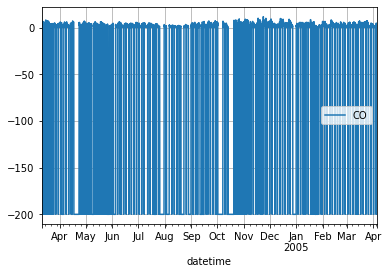

In [16]:
airq.plot()
plt.grid()

In [17]:
airq[airq['CO'] != -200].mean()

CO    2.15275
dtype: float64

In [18]:
airq[airq['CO'] == -200] = 2.15275

In [19]:
airq[airq['CO'] == -200]

,CO
datetime,


In [20]:
airq

,CO
datetime,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6
...,...
2005-04-04 10:00:00,3.1
2005-04-04 11:00:00,2.4
2005-04-04 12:00:00,2.4


<function matplotlib.pyplot.show(close=None, block=None)>

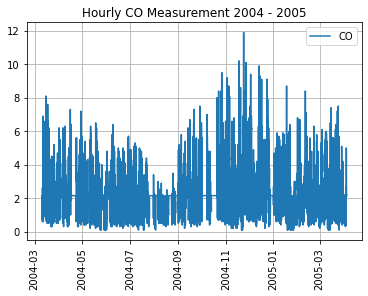

In [21]:
plt.plot(airq, label = 'CO')
plt.title('Hourly CO Measurement 2004 - 2005')
plt.grid()
plt.xticks(rotation = 90)
plt.legend()
plt.show

In [22]:
airq[-24:]

,CO
datetime,
2005-04-03 15:00:00,1.10000
2005-04-03 16:00:00,1.30000
2005-04-03 17:00:00,1.40000
2005-04-03 18:00:00,1.20000
2005-04-03 19:00:00,2.70000
2005-04-03 20:00:00,2.50000
2005-04-03 21:00:00,1.50000
2005-04-03 22:00:00,1.60000
2005-04-03 23:00:00,1.20000


In [23]:
# normalization
#airq = (airq - airq.mean()) / airq.std()

In [24]:
# split data into hist and future
y_hist = airq[:-96]
y_future = airq[-96:]

<function matplotlib.pyplot.show(close=None, block=None)>

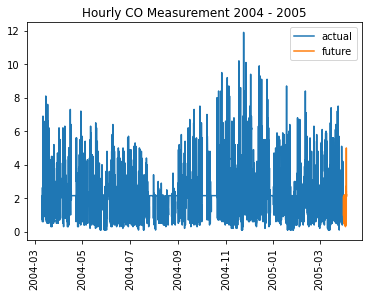

In [25]:
#plot data split
plt.plot(y_hist, label = 'actual')
plt.plot(y_future, label = 'future')
plt.title('Hourly CO Measurement 2004 - 2005')
plt.legend()
plt.xticks(rotation = 90)
plt.show

#### Show trend on data

<function matplotlib.pyplot.show(close=None, block=None)>

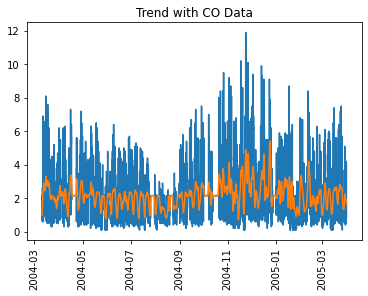

In [26]:
stl = STL(y_hist, period=24)
results = stl.fit()

# Answer check
plt.plot(y_hist)
plt.plot(results.trend)
#plt.plot(results.seasonal)
plt.title('Trend with CO Data')
#plt.legend()
plt.xticks(rotation = 90)
plt.show

### Check and show if additive model 'seasonal + trend' match original time series

<function matplotlib.pyplot.show(close=None, block=None)>

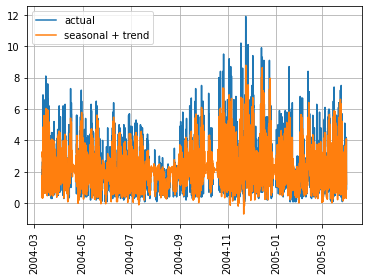

In [27]:
# additive model fits well! no need for multiplicative...
season_and_trend = results.seasonal + results.trend

# Plot
#plt.plot(season_and_trend, label = 'seasonal + trend')
plt.plot(y_hist, label = 'actual')
plt.plot(season_and_trend, label = 'seasonal + trend')
plt.grid()
plt.legend()
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

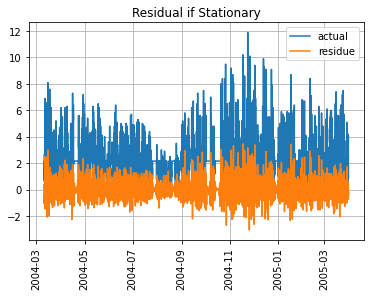

In [28]:
# plot residual
plt.plot(y_hist, label = 'actual')
plt.plot(results.resid, label = 'residue')
plt.grid()
plt.title('Residual if Stationary')
plt.legend()
plt.xticks(rotation = 90)
plt.show

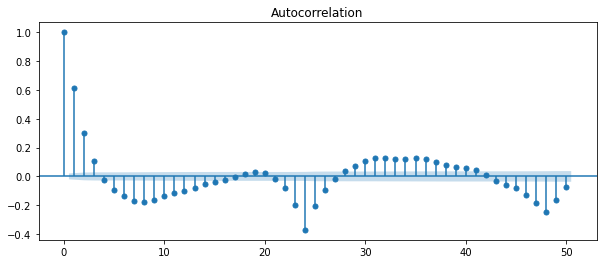

In [29]:
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(results.resid, lags=50, ax = ax)
plt.show()

In [30]:
# check stationarity
#adf_results = adfuller(results.resid.diff().dropna()) # check alternative if below is not stationary
adf_results = adfuller(results.resid)
print('ADF Statistic: %f' % adf_results[0])
print('p-value: %f' % adf_results[1], 'stationary' if (adf_results[0] <= 0.05) else 'not stationary')
print('Critical Values:')
for key, value in adf_results[4].items():
    print('\t%s: %.3f' % (key, value), 'stationary' if (adf_results[0] < value) else 'not stationary')
adf_results


ADF Statistic: -21.211974
p-value: 0.000000 stationary
Critical Values:
	1%: -3.431 stationary
	5%: -2.862 stationary
	10%: -2.567 stationary


(-21.211974346936564,
 0.0,
 38,
 9222,
 {'1%': -3.431059295288066,
  '5%': -2.8618534634125252,
  '10%': -2.566936851507016},
 9094.238191568482)

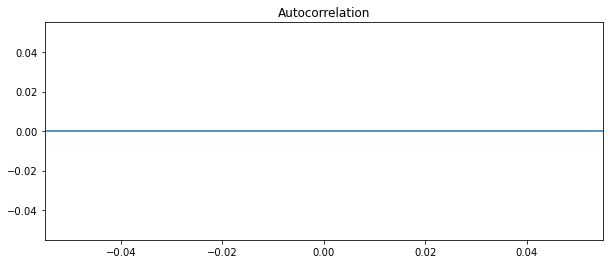

In [31]:
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(results.resid.diff(), lags=100, ax = ax)
plt.show()

In [32]:
print('Size:', len(airq))

Size: 9357


                      CO
datetime                
2004-03-10 18:00:00  2.6
2004-03-10 19:00:00  2.0
2004-03-10 20:00:00  2.2
2004-03-10 21:00:00  2.2
2004-03-10 22:00:00  1.6


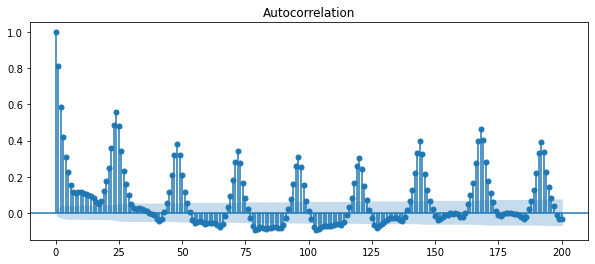

In [33]:
# check ACF
#airq_acf = acf(airq, fft = True)
# samples
print(airq[:5])
# plot acf
fig, ax = plt.subplots(figsize=(10,4))
plot_acf(airq, lags=200, ax = ax)
plt.show()

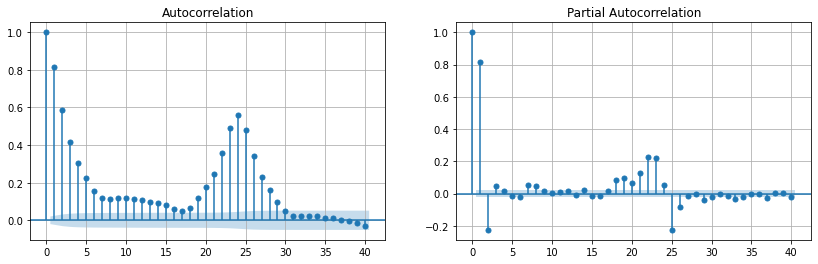

In [34]:
# plot ACF and PACF with plain series
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
# ACF
plot_acf(airq, ax = ax[0])
ax[0].grid()
# PACF
plot_pacf(airq, ax = ax[1])
ax[1].grid()

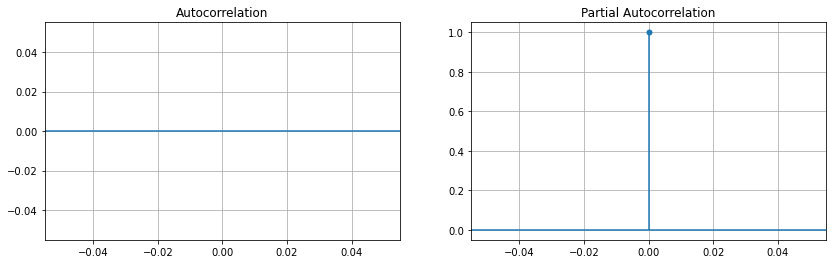

In [35]:
# do diff()
# plot ACF and PACF with plain series
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
# ACF
plot_acf(airq.diff(), ax = ax[0])
ax[0].grid()
# PACF
plot_pacf(airq.diff(), ax = ax[1])
ax[1].grid()

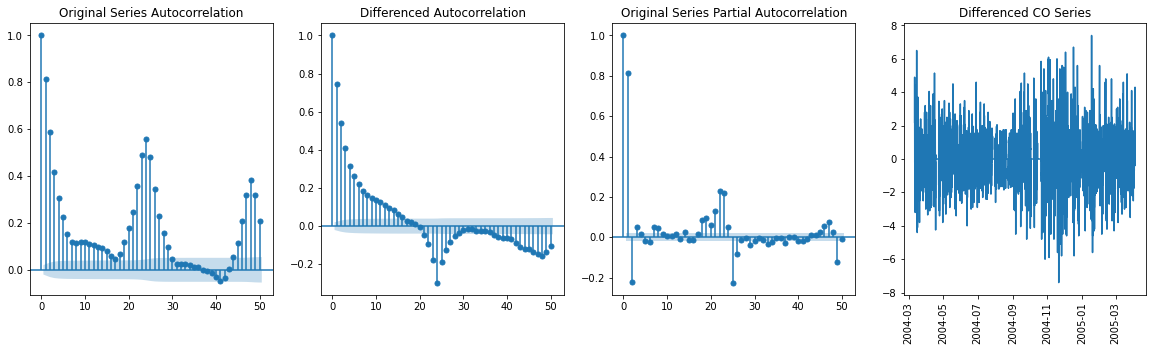

In [36]:
# Plot 
# Original CO series
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
plot_acf(airq, lags=50, ax = ax[0])
ax[0].set_title('Original Series Autocorrelation')

# Differenced Autocorrelation
plot_acf(airq.diff(24).dropna(), lags=50, ax = ax[1])
ax[1].set_title('Differenced Autocorrelation')

# Partial Autocorrelation
plot_pacf(airq, lags=50, ax = ax[2], method = 'ywm')
ax[2].set_title('Original Series Partial Autocorrelation')

ax[3].plot(airq.diff(24).dropna())
ax[3].set_title('Differenced CO Series')
ax[3].tick_params(axis='x', labelrotation=90)

In [37]:
#np.log(airq)

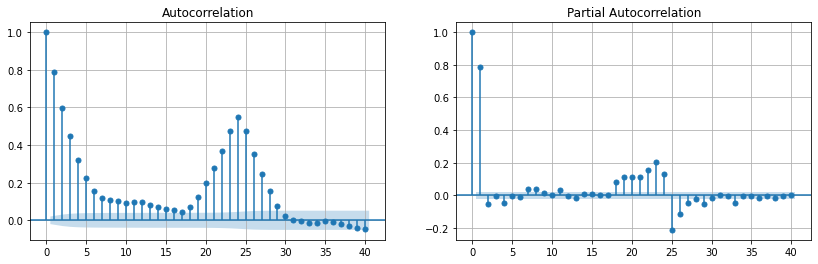

In [38]:
# log
# plot ACF and PACF with plain series
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(np.log(airq), ax = ax[0])
ax[0].grid()
plot_pacf(np.log(airq), ax = ax[1])
ax[1].grid()

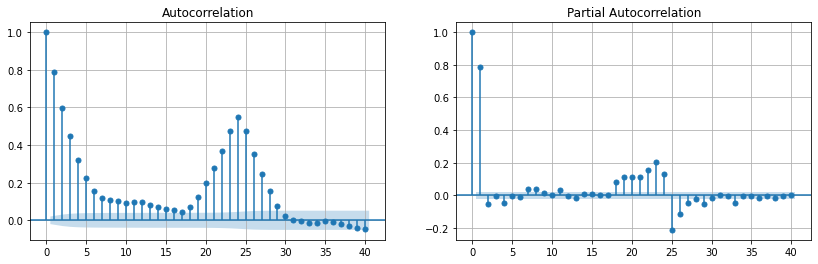

In [39]:
# diff
# plot ACF and PACF with plain series
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(np.log(airq), ax = ax[0])
ax[0].grid()
plot_pacf(np.log(airq), ax = ax[1])
ax[1].grid()

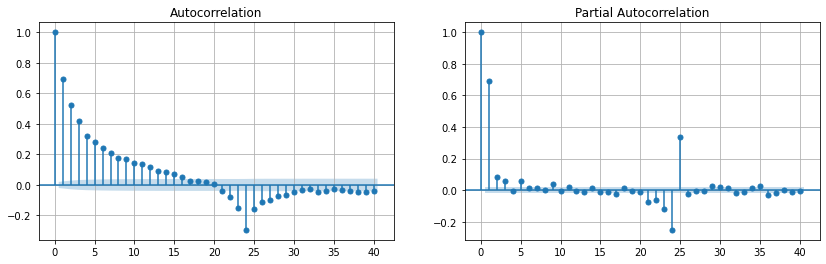

In [40]:
# log & diff
# plot ACF and PACF with plain series
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(np.log(airq).diff(24).dropna(), ax = ax[0])
ax[0].grid()
plot_pacf(np.log(airq).diff(24).dropna(), ax = ax[1])
ax[1].grid()

#### Show trend + 

#### Build Model

In [41]:
#instantiate
stlf = STLForecast(y_hist, ARIMA, model_kwargs={'order':(2, 0, 2), 'trend':"t", 'enforce_stationarity': True})
#fit model using historical data
stlf_results = stlf.fit()
#produce forecast for future data
#forecast = stlf_results.forecast(1)
forecast = stlf_results.forecast(len(y_future))

In [42]:
# stl = STL(y_hist, period=24)
# results = stl.fit()

# # Answer check
# plt.plot(results.trend)
# plt.plot(y_hist)
# plt.title('Trend with CO2 Data')

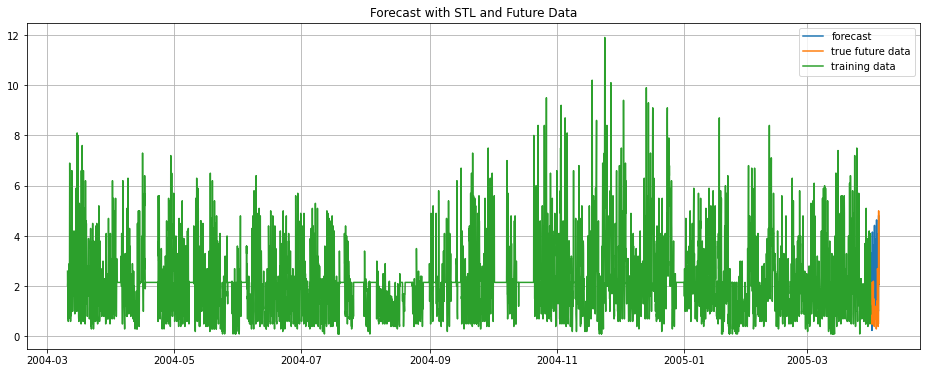

In [43]:
plt.subplots(figsize=(16,6))
plt.plot(forecast, label = 'forecast')
plt.plot(y_future, label = 'true future data')
plt.plot(y_hist, label = 'training data')
plt.legend()
plt.title('Forecast with STL and Future Data')
plt.grid()

In [44]:
forecast

2005-03-31 15:00:00    1.582431
2005-03-31 16:00:00    1.491811
2005-03-31 17:00:00    2.663976
2005-03-31 18:00:00    3.203030
2005-03-31 19:00:00    3.331284
                         ...   
2005-04-04 10:00:00    2.662313
2005-04-04 11:00:00    2.134699
2005-04-04 12:00:00    2.183838
2005-04-04 13:00:00    2.202083
2005-04-04 14:00:00    2.071139
Freq: H, Length: 96, dtype: float64

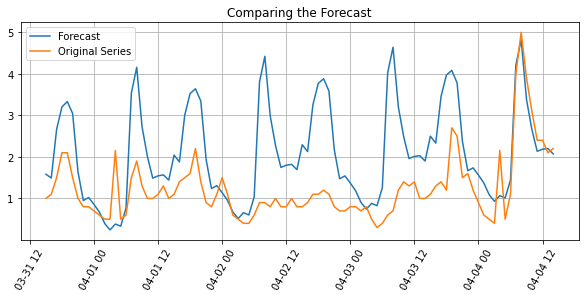

In [45]:
plt.subplots(figsize=(10,4))
plt.plot(forecast, label = 'Forecast')
plt.plot(y_future, label = 'Original Series')
plt.title('Comparing the Forecast')
plt.legend()
plt.xticks(rotation = 60)
plt.grid()

In [46]:
y_future

,CO
datetime,
2005-03-31 15:00:00,1.0
2005-03-31 16:00:00,1.1
2005-03-31 17:00:00,1.5
2005-03-31 18:00:00,2.1
2005-03-31 19:00:00,2.1
...,...
2005-04-04 10:00:00,3.1
2005-04-04 11:00:00,2.4
2005-04-04 12:00:00,2.4


In [47]:
pred_error = y_future['CO'] - forecast
mae = np.abs(pred_error).mean()
rmse = np.sqrt(np.square(pred_error).mean())
rmse2 = np.sqrt(mean_squared_error(y_future['CO'], forecast))

# Results
print(f'MAE   : {mae}')
print(f'RMSE  : {rmse}')
print(f'RMSE2 : {rmse2}')

MAE   : 0.9724595068578156
RMSE  : 1.2966376019704622
RMSE2 : 1.2966376019704622


Text(0.5, 1.0, 'Residual Stationary or Not?')

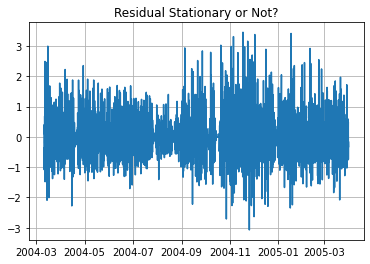

In [48]:
# residual analysis
# plot residual
plt.plot(stlf_results.result.resid)
plt.grid()
plt.title('Residual Stationary or Not?')

In [49]:
# check stationarity
#adf_results = adfuller(results.resid.diff().dropna()) # check alternative if below is not stationary
adf_results = adfuller(stlf_results.result.resid)
print('ADF Statistic: %f' % adf_results[0])
print('p-value: %f' % adf_results[1], 'stationary' if (adf_results[0] <= 0.05) else 'not stationary')
print('Critical Values:')
for key, value in adf_results[4].items():
    print('\t%s: %.3f' % (key, value), 'stationary' if (adf_results[0] < value) else 'not stationary')
adf_results

ADF Statistic: -21.211974
p-value: 0.000000 stationary
Critical Values:
	1%: -3.431 stationary
	5%: -2.862 stationary
	10%: -2.567 stationary


(-21.211974346936564,
 0.0,
 38,
 9222,
 {'1%': -3.431059295288066,
  '5%': -2.8618534634125252,
  '10%': -2.566936851507016},
 9094.238191568482)

# 23.2 Activity!

I found a dataset contains 9357 records of air pollutants with hourly averaged responses from 5 sensors, the measurement was taken for one year at road level in an Italian town: https://archive.ics.uci.edu/ml/datasets/Air+Quality. I only used CO reading, I did some cleanup as follows:
1. Made CO column float after replacing decimal symbol to ‘.’ from ‘,’: airq['CO'] = airq['CO(GT)'].str.replace(',','.').astype('float')
2. Missing measurement marked as -200, replaced them with mean() value: airq[airq['CO'] == -200] = 2.15275
3. Transformed date and time columns to airq['datetime'] = pd.to_datetime(aq['Date'] + ' ' + aq['Time'], format='%d/%m/%Y %H.%M.%S') and set index


Build historical and future datasets
Split last 4 days (96 hours) for future and rest in hist:
# split data into hist and future
y_hist = airq[:-96]
y_future = airq[-96:]


<function matplotlib.pyplot.show(close=None, block=None)>

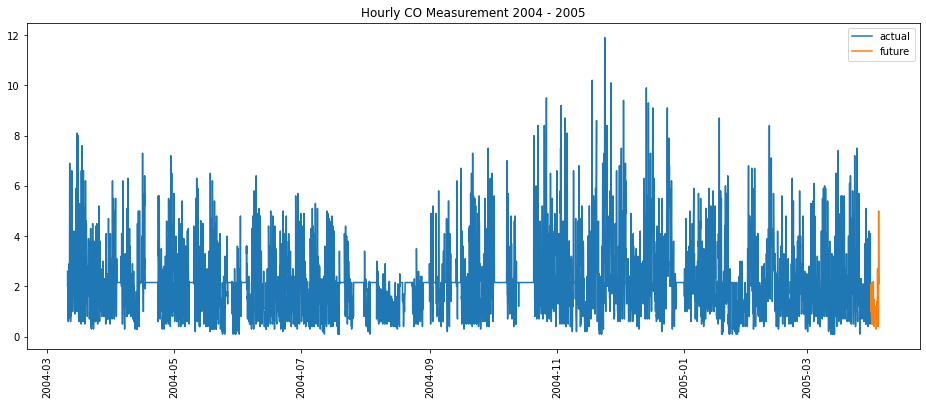

In [50]:
#plot data split
plt.subplots(figsize=(16,6))
plt.plot(y_hist, label = 'actual')
plt.plot(y_future, label = 'future')
plt.title('Hourly CO Measurement 2004 - 2005')
plt.legend()
plt.xticks(rotation = 90)
plt.show

## Data prep

In [52]:
airq

,CO
datetime,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6
...,...
2005-04-04 10:00:00,3.1
2005-04-04 11:00:00,2.4
2005-04-04 12:00:00,2.4


In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_airq = scaler.fit_transform(airq)

In [56]:
scaled_airq[1, 0]

0.16101694915254236

In [80]:
len(scaled_airq)

9357

In [81]:
train, test = scaled_airq[:-96], scaled_airq[-96:]

In [83]:
#test

In [138]:
def shape_dataset(dataset, look_back):
    X = []
    y = []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    X, y = np.array(X), np.array(y)
    return X, y

In [139]:
look_back = 24
X_train, Y_train = shape_dataset(train, look_back)
X_test, Y_test = shape_dataset(test, look_back)

In [140]:
#airq[:-96], airq[-96:]

In [151]:
train[1:25, 0]

array([0.16101695, 0.1779661 , 0.1779661 , 0.12711864, 0.09322034,
       0.09322034, 0.07627119, 0.06779661, 0.04237288, 0.17396186,
       0.05084746, 0.05084746, 0.08474576, 0.16101695, 0.1779661 ,
       0.13559322, 0.11864407, 0.12711864, 0.15254237, 0.23728814,
       0.1779661 , 0.1779661 , 0.23728814, 0.39830508])

In [152]:
X_train.shape

(9237, 24)

In [153]:
X_test.shape

(72, 24)

In [154]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [155]:
X_train.shape[1]

1

In [156]:
# # Reshape for efficient modelling
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Model

In [110]:
from tensorflow.keras.layers import Dense, Flatten, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [111]:
# Model

#look_back = 24
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
9237/9237 - 9s - loss: 0.0043 - 9s/epoch - 945us/step
Epoch 2/20
9237/9237 - 8s - loss: 0.0036 - 8s/epoch - 853us/step
Epoch 3/20
9237/9237 - 8s - loss: 0.0034 - 8s/epoch - 874us/step
Epoch 4/20
9237/9237 - 8s - loss: 0.0034 - 8s/epoch - 879us/step
Epoch 5/20
9237/9237 - 8s - loss: 0.0033 - 8s/epoch - 869us/step
Epoch 6/20
9237/9237 - 8s - loss: 0.0033 - 8s/epoch - 879us/step
Epoch 7/20
9237/9237 - 8s - loss: 0.0032 - 8s/epoch - 903us/step
Epoch 8/20
9237/9237 - 8s - loss: 0.0032 - 8s/epoch - 874us/step
Epoch 9/20
9237/9237 - 8s - loss: 0.0032 - 8s/epoch - 899us/step
Epoch 10/20
9237/9237 - 8s - loss: 0.0031 - 8s/epoch - 876us/step
Epoch 11/20
9237/9237 - 8s - loss: 0.0031 - 8s/epoch - 896us/step
Epoch 12/20
9237/9237 - 8s - loss: 0.0031 - 8s/epoch - 891us/step
Epoch 13/20
9237/9237 - 8s - loss: 0.0031 - 8s/epoch - 893us/step
Epoch 14/20
9237/9237 - 8s - loss: 0.0031 - 8s/epoch - 900us/step
Epoch 15/20
9237/9237 - 8s - loss: 0.0031 - 8s/epoch - 894us/step
Epoch 16/20
9237/92

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
trainScore = np.sqrt(mean_squared_error(scaler.inverse_transform([Y_train])[0],
                                        scaler.inverse_transform(model.predict(X_train))))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(scaler.inverse_transform([Y_test])[0],
                                       scaler.inverse_transform(model.predict(X_test))))
print('Test Score: %.2f RMSE' % (testScore))

289/289 [==============================] - 0s 694us/step
Train Score: 0.65 RMSE
3/3 [==============================] - 0s 1ms/step
Test Score: 0.53 RMSE


In [120]:
scaler.inverse_transform(model.predict(X_train))

289/289 [==============================] - 0s 670us/step


array([[2.773853 ],
       [4.2890077],
       [5.316199 ],
       ...,
       [1.3572199],
       [1.1509694],
       [1.0724101]], dtype=float32)

In [131]:
len(scaler.inverse_transform(model.predict(X_train))[:,0]), len(airq[:-96])

289/289 [==============================] - 0s 699us/step


(9237, 9261)

In [132]:
len(scaler.inverse_transform(model.predict(X_test))[:,0]), len(airq[-96:])

3/3 [==============================] - 0s 1ms/step


(72, 96)

In [171]:
y_hist[-250:]

,CO
datetime,
2005-03-25 09:00:00,4.3
2005-03-25 10:00:00,2.7
2005-03-25 11:00:00,1.6
2005-03-25 12:00:00,1.4
2005-03-25 13:00:00,2.3
...,...
2005-03-31 10:00:00,1.3
2005-03-31 11:00:00,1.2
2005-03-31 12:00:00,1.2


In [157]:
len(train), y_hist[24:].index

(9261,
 DatetimeIndex(['2004-03-11 18:00:00', '2004-03-11 19:00:00',
                '2004-03-11 20:00:00', '2004-03-11 21:00:00',
                '2004-03-11 22:00:00', '2004-03-11 23:00:00',
                '2004-03-12 00:00:00', '2004-03-12 01:00:00',
                '2004-03-12 02:00:00', '2004-03-12 03:00:00',
                ...
                '2005-03-31 05:00:00', '2005-03-31 06:00:00',
                '2005-03-31 07:00:00', '2005-03-31 08:00:00',
                '2005-03-31 09:00:00', '2005-03-31 10:00:00',
                '2005-03-31 11:00:00', '2005-03-31 12:00:00',
                '2005-03-31 13:00:00', '2005-03-31 14:00:00'],
               dtype='datetime64[ns]', name='datetime', length=9237, freq=None))

In [158]:
scaler.inverse_transform(model.predict(X_train))[:,0]

289/289 [==============================] - 0s 679us/step


array([2.773853 , 4.2890077, 5.316199 , ..., 1.3572199, 1.1509694,
       1.0724101], dtype=float32)

In [163]:
train_df = pd.DataFrame( {'CO': scaler.inverse_transform(model.predict(X_train))[:,0]} , index=y_hist[24:].index)
test_df = pd.DataFrame( {'CO': scaler.inverse_transform(model.predict(X_test))[:,0]} , index=y_future[24:].index)
#pd.DataFrame( {'CO': scaler.inverse_transform(model.predict(X_train))[:,0]}, index=y_hist[24:].index)
#pd.DataFrame( scaler.inverse_transform(model.predict(X_train))[:,0], columns='CO' )

3/3 [==============================] - 0s 1ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

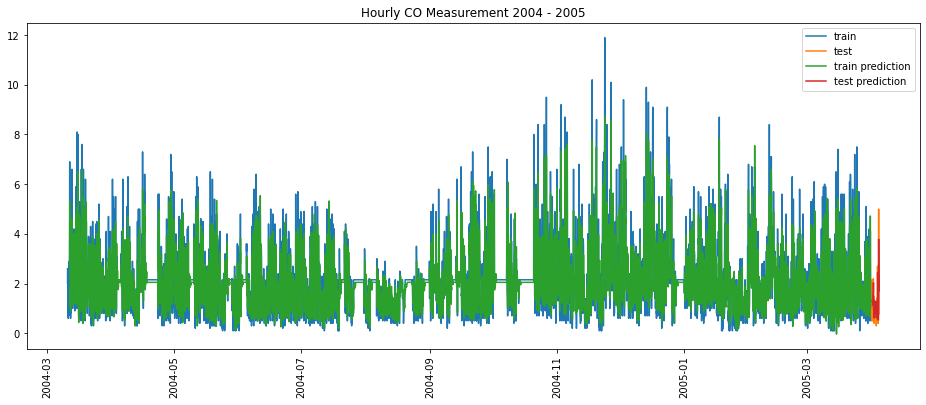

In [166]:
#plot data split
plt.subplots(figsize=(16,6))
plt.plot(y_hist, label = 'train')
plt.plot(y_future, label = 'test')
plt.plot(train_df, label = 'train prediction')
plt.plot(test_df, label = 'test prediction')
plt.title('Hourly CO Measurement 2004 - 2005')
plt.legend()
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

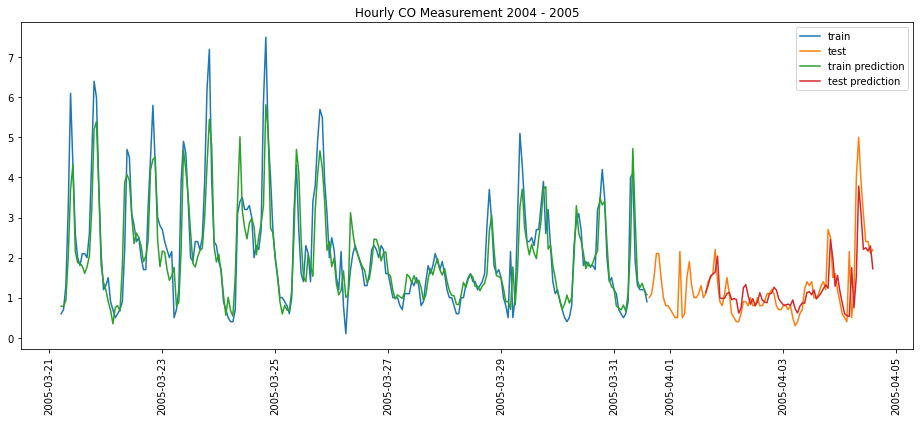

In [172]:
#plot data split
plt.subplots(figsize=(16,6))
plt.plot(y_hist[-250:], label = 'train')
plt.plot(y_future, label = 'test')
plt.plot(train_df[-250:], label = 'train prediction')
plt.plot(test_df, label = 'test prediction')
plt.title('Hourly CO Measurement 2004 - 2005')
plt.legend()
plt.xticks(rotation = 90)
plt.show